In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from rapidfuzz import fuzz, process
import xgboost as xgb
import lightgbm as lgb
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import time
import warnings
import optuna
from sklearn.metrics import make_scorer
warnings.filterwarnings("ignore")

ImportError: Matplotlib requires numpy>=1.20; you have 1.19.5

In [5]:
new_data = pd.read_csv('kc_house_data.csv')
new_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
new_data = new_data.drop(columns=['id', 'date'])

In [7]:
new_data.shape

(21613, 19)

In [8]:
new_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
new_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
new_data.size

410647

In [8]:
new_data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
for column in new_data.columns:
    unique_values_count = new_data[column].nunique()
    print(f"Количество уникальных значений в столбце {column}: {unique_values_count}")

Количество уникальных значений в столбце price: 4028
Количество уникальных значений в столбце bedrooms: 13
Количество уникальных значений в столбце bathrooms: 30
Количество уникальных значений в столбце sqft_living: 1038
Количество уникальных значений в столбце sqft_lot: 9782
Количество уникальных значений в столбце floors: 6
Количество уникальных значений в столбце waterfront: 2
Количество уникальных значений в столбце view: 5
Количество уникальных значений в столбце condition: 5
Количество уникальных значений в столбце grade: 12
Количество уникальных значений в столбце sqft_above: 946
Количество уникальных значений в столбце sqft_basement: 306
Количество уникальных значений в столбце yr_built: 116
Количество уникальных значений в столбце yr_renovated: 70
Количество уникальных значений в столбце zipcode: 70
Количество уникальных значений в столбце lat: 5034
Количество уникальных значений в столбце long: 752
Количество уникальных значений в столбце sqft_living15: 777
Количество уникаль

In [10]:
# min_value = min(new_data['sqft_lot'])
# max_value = max(new_data['sqft_lot'])
# num_intervals = 10
# interval_size = (max_value - min_value) / num_intervals

# bins = [min_value + i * interval_size for i in range(num_intervals + 1)]
# labels = [f'>{min_value + i * interval_size} and <= {min_value + (i+1) * interval_size}' for i in range(num_intervals)]

# new_data['sqft_lot'] = pd.cut(new_data['sqft_lot'], bins=bins, labels=labels, include_lowest=True)

In [11]:
label_encoder = LabelEncoder()

for column in new_data.columns:
    if (new_data[column].dtype == 'object') or (new_data[column].dtype == 'category'):
        new_data[column] = label_encoder.fit_transform(new_data[column])

In [12]:
new_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
new_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


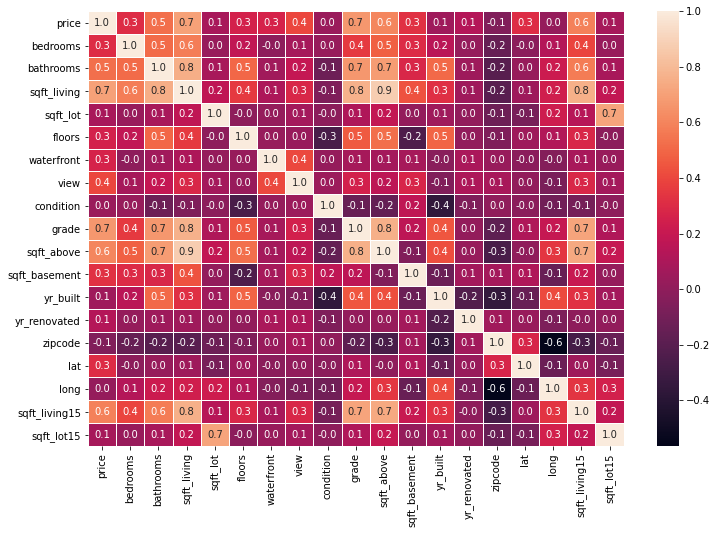

In [14]:
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(new_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [16]:
new_data = new_data.drop(columns = ['sqft_above', 'grade', 'bathrooms', 'sqft_living15'])
new_data

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1180,5650,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257,5650
1,538000.0,3,2570,7242,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319,7639
2,180000.0,2,770,10000,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233,8062
3,604000.0,4,1960,5000,1.0,0,0,5,910,1965,0,98136,47.5208,-122.393,5000
4,510000.0,3,1680,8080,1.0,0,0,3,0,1987,0,98074,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,1530,1131,3.0,0,0,3,0,2009,0,98103,47.6993,-122.346,1509
21609,400000.0,4,2310,5813,2.0,0,0,3,0,2014,0,98146,47.5107,-122.362,7200
21610,402101.0,2,1020,1350,2.0,0,0,3,0,2009,0,98144,47.5944,-122.299,2007
21611,400000.0,3,1600,2388,2.0,0,0,3,0,2004,0,98027,47.5345,-122.069,1287


Top columns with zero values and their percentages:
waterfront: 99.25%
yr_renovated: 95.77%
view: 90.17%
sqft_basement: 60.73%
bedrooms: 0.06%
price: 0.00%
sqft_living: 0.00%
sqft_lot: 0.00%
floors: 0.00%
condition: 0.00%
yr_built: 0.00%
zipcode: 0.00%
lat: 0.00%
long: 0.00%
sqft_lot15: 0.00%


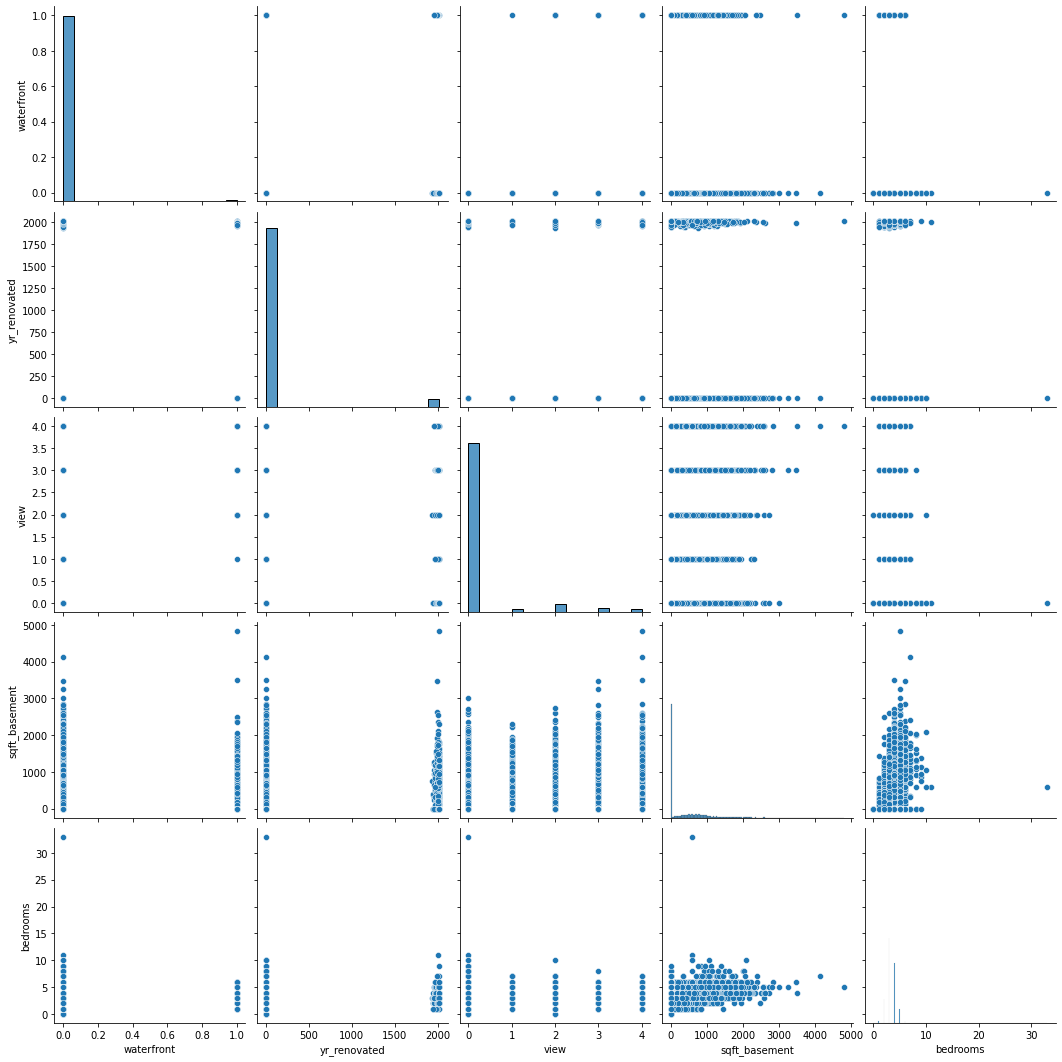

In [17]:
zero_percentage = (new_data[new_data == 0].count() / len(new_data)) * 100

top_zero_columns = zero_percentage.sort_values(ascending=False)

print("Top columns with zero values and their percentages:")
for column, percentage in top_zero_columns.items():
    print(f"{column}: {percentage:.2f}%")

selected_columns = top_zero_columns.head(5).index.tolist()

selected_data = new_data[selected_columns]

sns.pairplot(selected_data, height=3)
plt.show()

In [18]:
new_data = new_data.drop(columns = ['yr_renovated', 'sqft_basement', 'waterfront'])

In [19]:
new_data.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

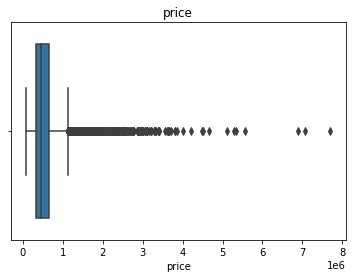

Number of outliers in price: 1146


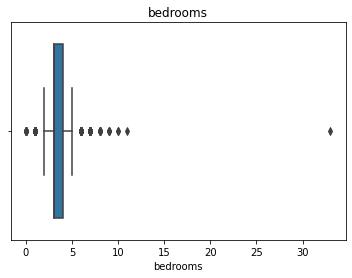

Number of outliers in bedrooms: 487


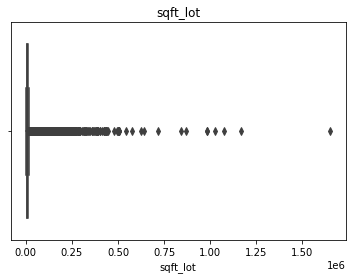

Number of outliers in sqft_lot: 2172


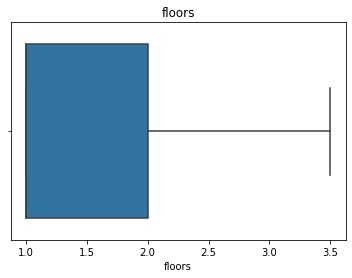

Number of outliers in floors: 0


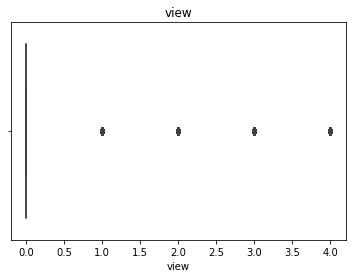

Number of outliers in view: 1258


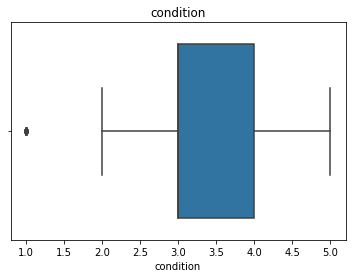

Number of outliers in condition: 15


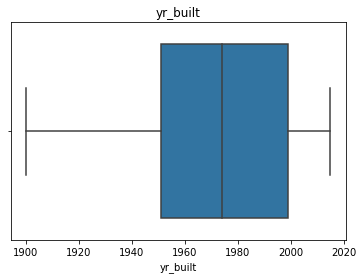

Number of outliers in yr_built: 0


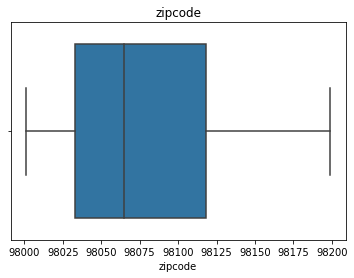

Number of outliers in zipcode: 0


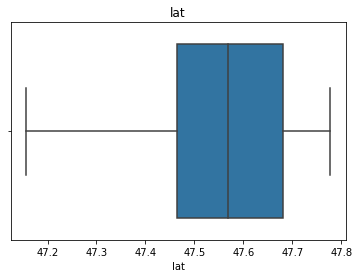

Number of outliers in lat: 0


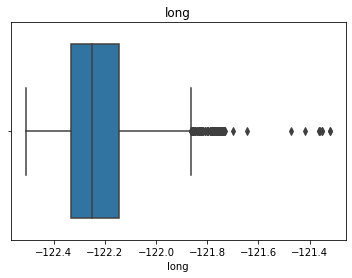

Number of outliers in long: 209


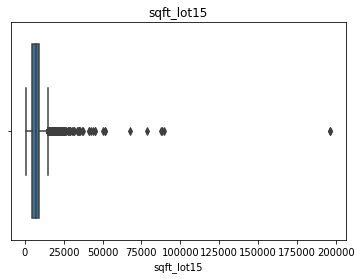

Number of outliers in sqft_lot15: 373


In [20]:
for column in ['price', 'bedrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15']:
    fig, ax = plt.subplots()
    sns.boxplot(x=new_data[column], ax=ax)
    ax.set_title(column)
    plt.show()
    outliers = new_data[column][(new_data[column] < new_data[column].quantile(0.25) - 1.5 * (new_data[column].quantile(0.75) - new_data[column].quantile(0.25))) | (new_data[column] > new_data[column].quantile(0.75) + 1.5 * (new_data[column].quantile(0.75) - new_data[column].quantile(0.25)))]
    print(f"Number of outliers in {column}: {len(outliers)}")
    new_data = new_data.drop(outliers.index)

In [21]:
X = new_data.drop('price', axis=1)
y = new_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
8,lat,0.491598
1,sqft_living,0.335543
9,long,0.056679
6,yr_built,0.030430
7,zipcode,0.026948
2,sqft_lot,0.021246
10,sqft_lot15,0.020423
5,condition,0.006266
3,floors,0.005883
0,bedrooms,0.004984


In [22]:
new_data = new_data.drop(['view'], axis=1)

# Linear model

In [23]:
X = new_data.drop('price', axis=1)
y = new_data['price']

In [24]:
columns = X.columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([457177.75264342, 547949.0766267 , 464741.5313671 , ...,
       222415.67821113, 214713.36333832, 306244.58652565])

In [28]:
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
linear_rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

print("R^2:", linear_r2)
print("MAE:", linear_mae)
print("MSE:", linear_mse)
print("MAPE:", linear_mape)
print("RMSPE:", linear_rmspe)

R^2: 0.614040942484817
MAE: 91600.6269224138
MSE: 14645889964.75702
MAPE: 21.914632914415836
RMSPE: 29.47200504580082


In [29]:
initial_mae = mean_absolute_error(y_test, y_pred)
initial_mse = mean_squared_error(y_test, y_pred)
initial_r2 = model.score(X_train, y_train)
initial_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
initial_rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"Initial MAE: {initial_mae}, Initial MSE: {initial_mse}, Initial R2: {initial_r2}, Initial MAPE: {initial_mape}, Initial RMSPE: {initial_rmspe}")

results = {}

for feature in X.columns:
    X_modified = X.drop(columns=[feature])
    X_train, X_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    linear_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    linear_rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

    results[feature] = (linear_mae, linear_mse, linear_r2, linear_mape, linear_rmspe)

for feature, (linear_mae, linear_mse, linear_r2, linear_mape, linear_rmspe) in results.items():
    print(f"Feature: {feature}, MAE Change: {initial_mae - linear_mae}, MSE Change: {initial_mse - linear_mse}, R2 Change: {initial_r2 - linear_r2}, MAPE Change: {initial_mape - linear_mape}, RMSPE Change: {initial_rmspe - linear_rmspe}")

Initial MAE: 91600.6269224138, Initial MSE: 14645889964.75702, Initial R2: 0.6093581834282997, Initial MAPE: 21.914632914415836, Initial RMSPE: 29.47200504580082
Feature: bedrooms, MAE Change: -774.8192271263542, MSE Change: -182461549.98298073, R2 Change: 0.0001255993316484627, MAPE Change: -0.15981589228717752, RMSPE Change: -0.12454732313762307
Feature: sqft_living, MAE Change: -23499.44562784674, MSE Change: -8204838528.029058, R2 Change: 0.21153706459111277, MAPE Change: -5.621554925916289, RMSPE Change: -7.756542450854695
Feature: sqft_lot, MAE Change: 137.60601407704235, MSE Change: -20671629.174194336, R2 Change: -0.004138005372543496, MAPE Change: 0.0320531654239673, RMSPE Change: -0.04447659925532221
Feature: floors, MAE Change: -944.0174930646754, MSE Change: -363314684.72995377, R2 Change: 0.00489157160124587, MAPE Change: -0.11980978342935344, RMSPE Change: -0.02239418366972501
Feature: condition, MAE Change: -471.10163813532563, MSE Change: -164443931.80716896, R2 Change:

In [30]:
feature_changes = []

for feature, (linear_mae, linear_mse, linear_r2, linear_mape, linear_rmspe) in results.items():
    mae_change = initial_mae - linear_mae
    mse_change = initial_mse - linear_mse
    r2_change = initial_r2 - linear_r2
    mape_change = initial_mape - linear_mape
    rmspe_change = initial_rmspe - linear_rmspe

    feature_changes.append((feature, mae_change, mse_change, r2_change, mape_change, rmspe_change))

top_5_mae = sorted(feature_changes, key=lambda x: x[1], reverse=True)[:5]
top_5_mse = sorted(feature_changes, key=lambda x: x[2], reverse=True)[:5]
top_5_r2 = sorted(feature_changes, key=lambda x: x[3], reverse=True)[:5]
top_5_mape = sorted(feature_changes, key=lambda x: x[4], reverse=True)[:5]
top_5_rmspe = sorted(feature_changes, key=lambda x: x[5], reverse=True)[:5]

print("Top 5 features improving MAE:")
for feature, mae_change, _, _, _, _ in top_5_mae:
    print(f"Feature: {feature}, MAE Change: {mae_change}")

print("\nTop 5 features improving MSE:")
for feature, _, mse_change, _, _, _ in top_5_mse:
    print(f"Feature: {feature}, MSE Change: {mse_change}")

print("\nTop 5 features improving R2:")
for feature, _, _, r2_change, _, _ in top_5_r2:
    print(f"Feature: {feature}, R2 Change: {r2_change}")

print("\nTop 5 features improving MAPE:")
for feature, _, _, _, mape_change, _ in top_5_mape:
    print(f"Feature: {feature}, MAPE Change: {mape_change}")

print("\nTop 5 features improving RMSPE:")
for feature, _, _, _, _, rmspe_change in top_5_rmspe:
    print(f"Feature: {feature}, RMSPE Change: {rmspe_change}")


Top 5 features improving MAE:
Feature: sqft_lot, MAE Change: 137.60601407704235
Feature: long, MAE Change: 110.33416977417073
Feature: sqft_lot15, MAE Change: -185.98154679061554
Feature: condition, MAE Change: -471.10163813532563
Feature: zipcode, MAE Change: -611.7754950666858

Top 5 features improving MSE:
Feature: long, MSE Change: 9223720.425762177
Feature: sqft_lot, MSE Change: -20671629.174194336
Feature: sqft_lot15, MSE Change: -25986922.946245193
Feature: condition, MSE Change: -164443931.80716896
Feature: bedrooms, MSE Change: -182461549.98298073

Top 5 features improving R2:
Feature: sqft_living, R2 Change: 0.21153706459111277
Feature: lat, R2 Change: 0.17425289428424762
Feature: yr_built, R2 Change: 0.021404987018087462
Feature: floors, R2 Change: 0.00489157160124587
Feature: zipcode, R2 Change: 0.0034917383153750814

Top 5 features improving MAPE:
Feature: sqft_lot, MAPE Change: 0.0320531654239673
Feature: long, MAPE Change: 0.022659275519217204
Feature: sqft_lot15, MAPE C

In [31]:
new_data = new_data.drop(['long'], axis=1)

# Linear model corrected

In [32]:
X = new_data.drop('price', axis=1)
y = new_data['price']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred

array([456580.41789839, 545923.93576853, 463575.93753729, ...,
       223260.90246956, 215953.60555701, 312555.21314268])

In [36]:
corrected_linear_r2 = r2_score(y_test, y_pred)
corrected_linear_mae = mean_absolute_error(y_test, y_pred)
corrected_linear_mse = mean_squared_error(y_test, y_pred)
corrected_linear_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
corrected_linear_rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

print("R^2:", corrected_linear_r2)
print("MAE:", corrected_linear_mae)
print("MSE:", corrected_linear_mse)
print("MAPE:", corrected_linear_mape)
print("RMSPE:", corrected_linear_rmspe)

R^2: 0.6142840126192285
MAE: 91490.29275263962
MSE: 14636666244.331259
MAPE: 21.89197363889662
RMSPE: 29.45447467877375


# Lasso, Elasticnet, Ridge 

In [37]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

basic_lasso_model = Lasso()
basic_lasso_model.fit(X_train, y_train)
basic_lasso_predictions = basic_lasso_model.predict(X_test)

basic_lasso_mae = mean_absolute_error(y_test, basic_lasso_predictions)
basic_lasso_mse = mean_squared_error(y_test, basic_lasso_predictions)
basic_lasso_r2 = r2_score(y_test, basic_lasso_predictions)
basic_lasso_mape = mean_absolute_percentage_error(y_test, basic_lasso_predictions)
basic_lasso_rmspe = root_mean_squared_percentage_error(y_test, basic_lasso_predictions)

print("Basic Lasso MAE:", basic_lasso_mae)
print("Basic Lasso MSE:", basic_lasso_mse)
print("Basic Lasso R-squared:", basic_lasso_r2)
print("Basic Lasso MAPE:", basic_lasso_mape)
print("Basic Lasso RMSPE:", basic_lasso_rmspe)
print("\n")

basic_elasticnet_model = ElasticNet()
basic_elasticnet_model.fit(X_train, y_train)
basic_elasticnet_predictions = basic_elasticnet_model.predict(X_test)

basic_elasticnet_mae = mean_absolute_error(y_test, basic_elasticnet_predictions)
basic_elasticnet_mse = mean_squared_error(y_test, basic_elasticnet_predictions)
basic_elasticnet_r2 = r2_score(y_test, basic_elasticnet_predictions)
basic_elasticnet_mape = mean_absolute_percentage_error(y_test, basic_elasticnet_predictions)
basic_elasticnet_rmspe = root_mean_squared_percentage_error(y_test, basic_elasticnet_predictions)

print("Basic ElasticNet MAE:", basic_elasticnet_mae)
print("Basic ElasticNet MSE:", basic_elasticnet_mse)
print("Basic ElasticNet R-squared:", basic_elasticnet_r2)
print("Basic ElasticNet MAPE:", basic_elasticnet_mape)
print("Basic ElasticNet RMSPE:", basic_elasticnet_rmspe)
print("\n")

basic_ridge_model = Ridge()
basic_ridge_model.fit(X_train, y_train)
basic_ridge_predictions = basic_ridge_model.predict(X_test)

basic_ridge_mae = mean_absolute_error(y_test, basic_ridge_predictions)
basic_ridge_mse = mean_squared_error(y_test, basic_ridge_predictions)
basic_ridge_r2 = r2_score(y_test, basic_ridge_predictions)
basic_ridge_mape = mean_absolute_percentage_error(y_test, basic_ridge_predictions)
basic_ridge_rmspe = root_mean_squared_percentage_error(y_test, basic_ridge_predictions)

print("Basic Ridge MAE:", basic_ridge_mae)
print("Basic Ridge MSE:", basic_ridge_mse)
print("Basic Ridge R-squared:", basic_ridge_r2)
print("Basic Ridge MAPE:", basic_ridge_mape)
print("Basic Ridge RMSPE:", basic_ridge_rmspe)


Optimal Lasso MAE: 91490.29250032481
Optimal Lasso MSE: 14636666398.555431
Optimal Lasso R-squared: 0.6142840085550019
Optimal Lasso MAPE: 21.89197336336797
Optimal Lasso RMSPE: 29.454474429688254


Optimal ElasticNet MAE: 91478.01828166521
Optimal ElasticNet MSE: 14639488694.337303
Optimal ElasticNet R-squared: 0.6142096333806273
Optimal ElasticNet MAPE: 21.881919533819776
Optimal ElasticNet RMSPE: 29.447936339790786


Optimal Ridge MAE: 91488.95509034363
Optimal Ridge MSE: 14636797839.710814
Optimal Ridge R-squared: 0.614280544722857
Optimal Ridge MAPE: 21.891088668444166
Optimal Ridge RMSPE: 29.453847320801223


In [ ]:
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

optimal_alpha_lasso = lasso_grid.best_params_['alpha']
optimal_lasso_model = Lasso(alpha=optimal_alpha_lasso)
optimal_lasso_model.fit(X_train, y_train)
optimal_lasso_predictions = optimal_lasso_model.predict(X_test)

optimal_lasso_mae = mean_absolute_error(y_test, optimal_lasso_predictions)
optimal_lasso_mse = mean_squared_error(y_test, optimal_lasso_predictions)
optimal_lasso_r2 = r2_score(y_test, optimal_lasso_predictions)
optimal_lasso_mape = mean_absolute_percentage_error(y_test, optimal_lasso_predictions)
optimal_lasso_rmspe = root_mean_squared_percentage_error(y_test, optimal_lasso_predictions)

print("Optimal Lasso MAE:", optimal_lasso_mae)
print("Optimal Lasso MSE:", optimal_lasso_mse)
print("Optimal Lasso R-squared:", optimal_lasso_r2)
print("Optimal Lasso MAPE:", optimal_lasso_mape)
print("Optimal Lasso RMSPE:", optimal_lasso_rmspe)
print("\n")

param_grid_elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
elasticnet_grid = GridSearchCV(ElasticNet(), param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train)

optimal_alpha_elasticnet = elasticnet_grid.best_params_['alpha']
optimal_l1_ratio_elasticnet = elasticnet_grid.best_params_['l1_ratio']
optimal_elasticnet_model = ElasticNet(alpha=optimal_alpha_elasticnet, l1_ratio=optimal_l1_ratio_elasticnet)
optimal_elasticnet_model.fit(X_train, y_train)
optimal_elasticnet_predictions = optimal_elasticnet_model.predict(X_test)

optimal_elasticnet_mae = mean_absolute_error(y_test, optimal_elasticnet_predictions)
optimal_elasticnet_mse = mean_squared_error(y_test, optimal_elasticnet_predictions)
optimal_elasticnet_r2 = r2_score(y_test, optimal_elasticnet_predictions)
optimal_elasticnet_mape = mean_absolute_percentage_error(y_test, optimal_elasticnet_predictions)
optimal_elasticnet_rmspe = root_mean_squared_percentage_error(y_test, optimal_elasticnet_predictions)

print("Optimal ElasticNet MAE:", optimal_elasticnet_mae)
print("Optimal ElasticNet MSE:", optimal_elasticnet_mse)
print("Optimal ElasticNet R-squared:", optimal_elasticnet_r2)
print("Optimal ElasticNet MAPE:", optimal_elasticnet_mape)
print("Optimal ElasticNet RMSPE:", optimal_elasticnet_rmspe)
print("\n")

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

optimal_alpha_ridge = ridge_grid.best_params_['alpha']
optimal_ridge_model = Ridge(alpha=optimal_alpha_ridge)
optimal_ridge_model.fit(X_train, y_train)
optimal_ridge_predictions = optimal_ridge_model.predict(X_test)

optimal_ridge_mae = mean_absolute_error(y_test, optimal_ridge_predictions)
optimal_ridge_mse = mean_squared_error(y_test, optimal_ridge_predictions)
optimal_ridge_r2 = r2_score(y_test, optimal_ridge_predictions)
optimal_ridge_mape = mean_absolute_percentage_error(y_test, optimal_ridge_predictions)
optimal_ridge_rmspe = root_mean_squared_percentage_error(y_test, optimal_ridge_predictions)

print("Optimal Ridge MAE:", optimal_ridge_mae)
print("Optimal Ridge MSE:", optimal_ridge_mse)
print("Optimal Ridge R-squared:", optimal_ridge_r2)
print("Optimal Ridge MAPE:", optimal_ridge_mape)
print("Optimal Ridge RMSPE:",optimal_ridge_rmspe)


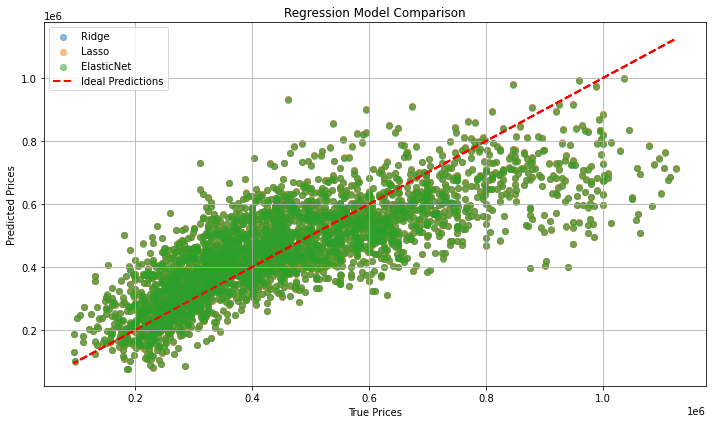

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimal_ridge_predictions, label='Ridge', alpha=0.5)
plt.scatter(y_test, optimal_lasso_predictions, label='Lasso', alpha=0.5)
plt.scatter(y_test, optimal_elasticnet_predictions, label='ElasticNet', alpha=0.5)

y_test_array = np.array(y_test)

plt.plot(y_test_array, y_test_array, color='red', linestyle='--', linewidth=2, label='Ideal Predictions')

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Model Comparison')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


# RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor, VotingRegressor

In [40]:
def root_mean_squared_percentage_error(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
ab_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=10, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=10, random_state=42)
bg_model = BaggingRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=10, random_state=42)
stack_model = StackingRegressor(estimators=[('rf', rf_model), ('ab', ab_model), ('gb', gb_model)], final_estimator=LinearRegression())
voting_model = VotingRegressor(estimators=[('rf', rf_model), ('ab', ab_model), ('gb', gb_model)])

models = [rf_model, ab_model, gb_model, bg_model, stack_model, voting_model]

rmspe_scorer = make_scorer(root_mean_squared_percentage_error, greater_is_better=False)

for model in models:
    start_time = time.time()
    scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    scores_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
    scores_mape = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    scores_rmspe = cross_val_score(model, X, y, cv=5, scoring=rmspe_scorer)
    
    mae = -scores_mae.mean()
    mse = -scores_mse.mean()
    r2 = scores_r2.mean()
    mape = -scores_mape.mean()*100
    rmspe = -scores_rmspe.mean()  

    model_name = model.__class__.__name__
    print(f'{model_name}:\nMean absolute error: {mae} (+/- {scores_mae.std() * 2})')
    print(f'Mean squared error: {mse} (+/- {scores_mse.std() * 2})')
    print(f'R^2: {r2}')
    print(f'Mean absolute percentage error: {mape} (+/- {scores_mape.std() * 2})')
    print(f'Root mean squared percentage error: {rmspe} (+/- {scores_rmspe.std() * 2})')
    print(f'time:{time.time() - start_time}\n')  

    if model_name == 'RandomForestRegressor':
        rf_model_mae, rf_model_mse, rf_model_r2, rf_model_mape, rf_model_rmspe = mae, mse, r2, mape, rmspe
    elif model_name == 'AdaBoostRegressor':
        ab_model_mae, ab_model_mse, ab_model_r2, ab_model_mape, ab_model_rmspe = mae, mse, r2, mape, rmspe
    elif model_name == 'GradientBoostingRegressor':
        gb_model_mae, gb_model_mse, gb_model_r2, gb_model_mape, gb_model_rmspe = mae, mse, r2, mape, rmspe
    elif model_name == 'BaggingRegressor':
        bg_model_mae, bg_model_mse, bg_model_r2, bg_model_mape, bg_model_rmspe = mae, mse, r2, mape, rmspe
    elif model_name == 'StackingRegressor':
        stack_model_mae, stack_model_mse, stack_model_r2, stack_model_mape, stack_model_rmspe = mae, mse, r2, mape, rmspe
    elif model_name == 'VotingRegressor':
        voting_model_mae, voting_model_mse, voting_model_r2, voting_model_mape, voting_model_rmspe = mae, mse, r2, mape, rmspe

RandomForestRegressor:
Mean absolute error: 55166.49147194509 (+/- 1667.7677400542987)
Mean squared error: 6219538750.333187 (+/- 575350829.4569134)
R^2: 0.8362419365234468
Mean absolute percentage error: 13.112126111586639 (+/- 0.011439276246894366)
Root mean squared percentage error: 19.29894211107317 (+/- 2.305910489019205)
time:20.99067711830139

AdaBoostRegressor:
Mean absolute error: 80001.20507149231 (+/- 4292.303178428272)
Mean squared error: 11236380542.41737 (+/- 1426769158.9670308)
R^2: 0.704425554697494
Mean absolute percentage error: 20.065834230955794 (+/- 0.01334523106061248)
Root mean squared percentage error: 28.571675200383105 (+/- 2.4377396991404128)
time:4.5210795402526855

GradientBoostingRegressor:
Mean absolute error: 93597.6064414097 (+/- 5885.217521017731)
Mean squared error: 15346244041.964146 (+/- 2563523438.5352955)
R^2: 0.5966870901585815
Mean absolute percentage error: 24.01698466615338 (+/- 0.020695919299076555)
Root mean squared percentage error: 33.8885

In [40]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_percentage_error(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
ab_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=10, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=10, random_state=42)

estimators = [('rf', rf_model), ('ab', ab_model), ('gb', gb_model)]

stack_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

params = {'rf__n_estimators': [50, 100], 'rf__max_depth': [5, 10], 
          'ab__n_estimators': [50, 100], 'ab__learning_rate': [0.1, 0.5], 
          'gb__n_estimators': [50, 100], 'gb__max_depth': [5, 10]}

pipeline = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

rand_search = RandomizedSearchCV(estimator=stack_model, param_distributions=params, cv=2, verbose=10)

rand_search.fit(X, y)

best_stack_model = rand_search.best_estimator_

stack_model_predictions = best_stack_model.predict(X_test)

best_stack_model_mae = mean_absolute_error(y_test, stack_model_predictions)
best_stack_model_mse = mean_squared_error(y_test, stack_model_predictions)
best_stack_model_r2 = r2_score(y_test, stack_model_predictions)
best_stack_model_mape = mean_absolute_percentage_error(y_test, stack_model_predictions)
best_stack_model_rmspe = root_mean_squared_percentage_error(y_test, stack_model_predictions)

print("Best Stack Model MAE:", best_stack_model_mae)
print("Best Stack Model MSE:", best_stack_model_mse)
print("Best Stack Model R-squared:", best_stack_model_r2)
print("Best Stack Model MAPE:", best_stack_model_mape)
print("Best Stack Model RMSPE:", best_stack_model_rmspe)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START ab__learning_rate=0.5, ab__n_estimators=100, gb__max_depth=10, gb__n_estimators=50, rf__max_depth=5, rf__n_estimators=100
[CV 1/2; 1/10] END ab__learning_rate=0.5, ab__n_estimators=100, gb__max_depth=10, gb__n_estimators=50, rf__max_depth=5, rf__n_estimators=100;, score=0.838 total time=  18.9s
[CV 2/2; 1/10] START ab__learning_rate=0.5, ab__n_estimators=100, gb__max_depth=10, gb__n_estimators=50, rf__max_depth=5, rf__n_estimators=100
[CV 2/2; 1/10] END ab__learning_rate=0.5, ab__n_estimators=100, gb__max_depth=10, gb__n_estimators=50, rf__max_depth=5, rf__n_estimators=100;, score=0.843 total time=  18.1s
[CV 1/2; 2/10] START ab__learning_rate=0.5, ab__n_estimators=50, gb__max_depth=5, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=50
[CV 1/2; 2/10] END ab__learning_rate=0.5, ab__n_estimators=50, gb__max_depth=5, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=50;, score=0.844 total tim

[learning_curve] Training set sizes: [ 797 2592 4386 6181 7976]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  10 | elapsed:    6.1s remaining:   55.5s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   10.5s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   14.4s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   17.9s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.2s finished


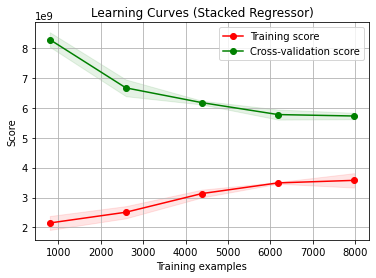

In [41]:
def plot_and_analyze_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring="neg_mean_squared_error", verbose=10)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
title = "Learning Curves (Stacked Regressor)"
cv = 2
plot_and_analyze_learning_curve(best_stack_model, title, X, y, cv=cv, n_jobs=-1)

# XGBRegressor, LGBMRegressor

In [42]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)
xgb_rmspe = root_mean_squared_percentage_error(y_test, xgb_pred)

print('XGBoost MAE:', xgb_mae)
print('XGBoost MSE:', xgb_mse)
print('XGBoost R^2:', xgb_r2)
print('XGBoost MAPE:', xgb_mape)
print('XGBoost RMSPE:', xgb_rmspe)

lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_mse = mean_squared_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)
lgbm_mape = mean_absolute_percentage_error(y_test, lgbm_pred)
lgbm_rmspe = root_mean_squared_percentage_error(y_test, lgbm_pred)

print('LightGBM MAE:', lgbm_mae)
print('LightGBM MSE:', lgbm_mse)
print('LightGBM R^2:', lgbm_r2)
print('LightGBM MAPE:', lgbm_mape)
print('LightGBM RMSPE:', lgbm_rmspe)

XGBoost MAE: 61312.157758147914
XGBoost MSE: 7207680359.840119
XGBoost R^2: 0.8100580077244395
XGBoost MAPE: 14.687014102496962
XGBoost RMSPE: 20.929031395662197
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 12762, number of used features: 9
[LightGBM] [Info] Start training from score 453399.979314
LightGBM MAE: 50925.8877502931
LightGBM MSE: 5276155070.27958
LightGBM R^2: 0.8609589555070206
LightGBM MAPE: 12.153127817067597
LightGBM RMSPE: 17.78922865912701


In [ ]:
def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300)
    }

    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_lgbm_model = lgb.LGBMRegressor(**best_params)
best_lgbm_model.fit(X_train, y_train)
best_preds = best_lgbm_model.predict(X_test)

best_mae = mean_absolute_error(y_test, best_preds)
best_mse = mean_squared_error(y_test, best_preds)
best_r2 = r2_score(y_test, best_preds)
best_mape = mean_absolute_percentage_error(y_test, best_preds)
best_rmspe = root_mean_squared_percentage_error(y_test, best_preds)

print('Best LightGBM MAE:', best_mae)
print('Best LightGBM MSE:', best_mse)
print('Best LightGBM R^2:', best_r2)
print('Best LightGBM MAPE:', best_mape)
print('Best LightGBM RMSPE:', best_rmspe)
print('Best Hyperparameters:', best_params)

# NN

In [55]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_percentage_error(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

def build_and_train_model(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        BatchNormalization(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mean_absolute_error'])
    model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

    predictions = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    rmspe = root_mean_squared_percentage_error(y_test, predictions)

    return mae, mse, rmse, r2, mape, rmspe

initial_mae, initial_mse, initial_rmse, initial_r2, initial_mape, initial_rmspe = build_and_train_model(X_train, y_train, X_test, y_test)
print(f'Initial Neural Network MAE: {initial_mae}')
print(f'Initial Neural Network MSE: {initial_mse}')
print(f'Initial Neural Network RMSE: {initial_rmse}')
print(f'Initial Neural Network R^2: {initial_r2}')
print(f'Initial Neural Network MAPE: {initial_mape}')
print(f'Initial Neural Network RMSPE: {initial_rmspe}')

Trial 20 Complete [00h 01m 40s]
val_mean_absolute_error: 443409.25

Best val_mean_absolute_error So Far: 59529.4140625
Total elapsed time: 00h 33m 56s
100/100 [==============================] - 0s 1ms/step
Best Neural Network MAE: 60275.97144312128
Best Neural Network MSE: 7315541438.654286
Best Neural Network RMSE: 85530.93848809498
Best Neural Network R^2: 0.8072155747673531
Best Neural Network MAPE: 13.914006753083308
Best Neural Network RMSPE: 19.630002279171997


In [7]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mse', metrics=['mean_absolute_error'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=20,
    executions_per_trial=1,
    directory='tuning',
    project_name='keras_tuning'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

SyntaxError: EOL while scanning string literal (<ipython-input-7-4e0e34c84434>, line 2)

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

print(f'Best Hyperparameters: {best_hyperparameters.values}')
predictions = best_model.predict(X_test).flatten()
best_initial_mae = mean_absolute_error(y_test, predictions)
best_initial_mse = mean_squared_error(y_test, predictions)
best_initial_rmse = np.sqrt(best_initial_mse)
best_initial_r2 = r2_score(y_test, predictions)
best_initial_mape = mean_absolute_percentage_error(y_test, predictions)
best_initial_rmspe = root_mean_squared_percentage_error(y_test, predictions)

print(f'Best Neural Network MAE: {best_initial_mae}')
print(f'Best Neural Network MSE: {best_initial_mse}')
print(f'Best Neural Network RMSE: {best_initial_rmse}')
print(f'Best Neural Network R^2: {best_initial_r2}')
print(f'Best Neural Network MAPE: {best_initial_mape}')
print(f'Best Neural Network RMSPE: {best_initial_rmspe}')

In [ ]:
models = ["Linear", "Corrected_Linear", "Lasso", "Elasticnet", "Ridge", "Best_Lasso", "Best_Elasticnet", "Best_Ridge", "RandomForestRegressor",
          "AdaBoostRegressor", "GradientBoostingRegressor", "BaggingRegressor", "StackingRegressor",
          "VotingRegressor", "Best_StackingRegressor", "XGBRegressor", "LGBMRegressor", "Best_LGBMRegressor", "Best_XGBRegressor", "NN", "Best_NN"]

mae_values=[linear_mae, corrected_linear_mae, basic_lasso_mae, basic_elasticnet_mae, basic_ridge_mae, optimal_lasso_mae, optimal_elasticnet_mae, optimal_ridge_mae, rf_model_mae, ab_model_mae, gb_model_mae, bg_model_mae, stack_model_mae, voting_model_mae, best_stack_model_mae, xgb_mae, lgbm_mae, best_xgb_mae, best_lgbm_mae, initial_mae, best_initial_mae]
mse_values=[linear_mse, corrected_linear_mse, basic_lasso_mse, basic_elasticnet_mse, basic_ridge_mse, optimal_lasso_mse, optimal_elasticnet_mse, optimal_ridge_mse, rf_model_mse, ab_model_mse, gb_model_mse, bg_model_mse, stack_model_mse, voting_model_mse, best_stack_model_mse, xgb_mse, lgbm_mse, best_xgb_mse, best_lgbm_mse, initial_mse, best_initial_mse]
r2_values=[linear_r2, corrected_linear_r2, basic_lasso_r2, basic_elasticnet_r2, basic_ridge_r2, optimal_lasso_r2, optimal_elasticnet_r2, optimal_ridge_r2, rf_model_r2, ab_model_r2, gb_model_r2, bg_model_r2, stack_model_r2, voting_model_r2, best_stack_model_r2, xgb_r2, lgbm_r2, best_xgb_r2, best_lgbm_r2, initial_r2, best_initial_r2]
mape_values=[linear_mape, corrected_linear_mape, basic_lasso_mape, basic_elasticnet_mape, basic_ridge_mape, optimal_lasso_mape, optimal_elasticnet_mape, optimal_ridge_mape, rf_model_mape, ab_model_mape, gb_model_mape, bg_model_mape, stack_model_mape, voting_model_mape, best_stack_model_mape, xgb_mape, lgbm_mape, best_xgb_mape, best_lgbm_mape, initial_mape, best_initial_mape]
rmspe_values=[linear_rmspe, corrected_linear_rmspe, basic_lasso_rmspe, basic_elasticnet_rmspe, basic_ridge_rmspe, optimal_lasso_rmspe, optimal_elasticnet_rmspe, optimal_ridge_rmspe, rf_model_rmspe, ab_model_rmspe, gb_model_rmspe, bg_model_rmspe, stack_model_rmspe, voting_model_rmspe, best_stack_model_rmspe, xgb_rmspe, lgbm_rmspe, best_xgb_rmspe, best_lgbm_rmspe,  initial_rmspe, best_initial_rmspe]

def plot_metric(values, metric_name, color):
    plt.figure(figsize=(16, 8))
    bars = plt.bar(models, values, color=color)
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Across Models')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_metric(mae_values, 'Mean Absolute Error (MAE)', 'skyblue')
plot_metric(mse_values, 'Mean Squared Error (MSE)', 'lightgreen')
plot_metric(r2_values, 'R^2', 'coral')
plot_metric(mape_values, 'Mean Absolute Percentage Error (MAPE)', 'orchid')
plot_metric(rmspe_values, 'Root Mean Squared Percentage Error (RMSPE)', 'gold')